In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import fourier_analysis, compare_homo_hetero, fourier_instability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import math
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df_1 = pd.read_csv("Data/data_seed4_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_2 = pd.read_csv("Data/data_seed8_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_3 = pd.read_csv("Data/data_seed16_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_4 = pd.read_csv("Data/data_seed32_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_5 = pd.read_csv("Data/data_seed64_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_6 = pd.read_csv("Data/data_seed128_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_7 = pd.read_csv("Data/data_seed256_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_8 = pd.read_csv("Data/data_seed512_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")
df_9 = pd.read_csv("Data/data_seed1024_mm1000_me01_mi01_sdm0_sde0_sdi0.csv")

df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9], axis = 1)
df

,Seed 4,Seed 8,Seed 16,Seed 32,Seed 64,Seed 128,Seed 256,Seed 512,Seed 1024
0,0.775,0.774,0.774,0.671,0.738,0.749,0.698,0.738,0.701
1,0.688,0.698,0.674,0.546,0.629,0.628,0.576,0.618,0.581
2,0.686,0.690,0.657,0.546,0.624,0.622,0.572,0.601,0.572
3,0.677,0.689,0.656,0.537,0.621,0.620,0.565,0.594,0.571
4,0.674,0.679,0.650,0.538,0.619,0.615,0.565,0.587,0.573
5,0.673,0.686,0.645,0.538,0.617,0.617,0.562,0.586,0.573
6,0.674,0.689,0.642,0.545,0.610,0.605,0.559,0.584,0.563
7,0.668,0.692,0.640,0.542,0.607,0.607,0.559,0.583,0.558
8,0.661,0.682,0.640,0.547,0.605,0.600,0.545,0.584,0.551
9,0.660,0.672,0.634,0.548,0.598,0.593,0.539,0.590,0.558


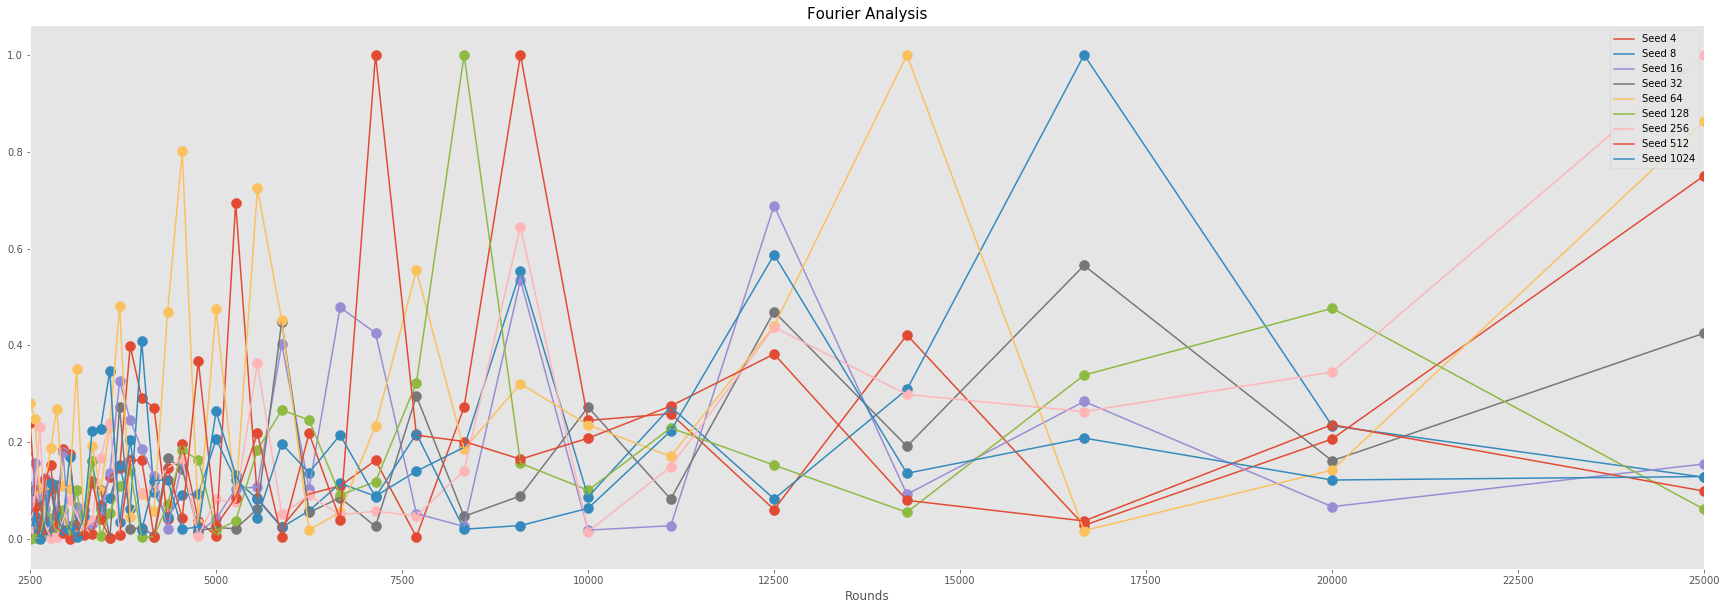

In [3]:
fourier_analysis(df, fig_style='ggplot', x_lim=(2500,25000))

In [4]:
a = fourier_instability([df[column] for column in df], np.arange(4,11))

In [5]:
a.to_csv("fourier_instability_CONTROLGROUP.csv", index = False)